In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("C:/Users/RYAN RACHMADHA F/Desktop/File Ryan/University/Sem 7/Machine Learning/Praktikum 1_1217070079_Ryan Rachmadha/Bahan data/FuelConsumptionCo2.csv")
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


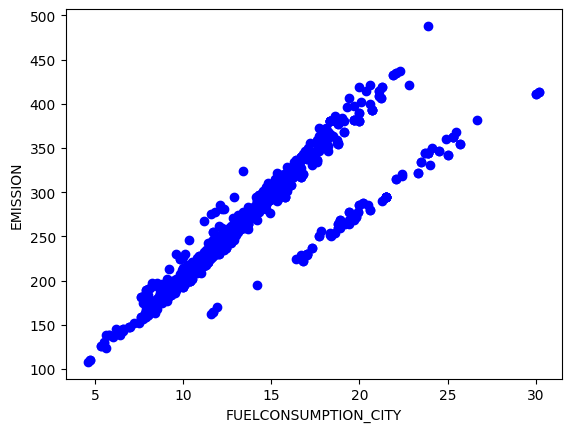

In [4]:
import matplotlib.pyplot as plt

# Kita plot hubungannya
#fig=plt.figure(figsize=(8,6))
plt.scatter(cdf['FUELCONSUMPTION_CITY'], cdf['CO2EMISSIONS'], color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("EMISSION")
#plt.xticks(np.arange(0, 5001, 100))
#plt.yticks(np.arange(0, 31, 5))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

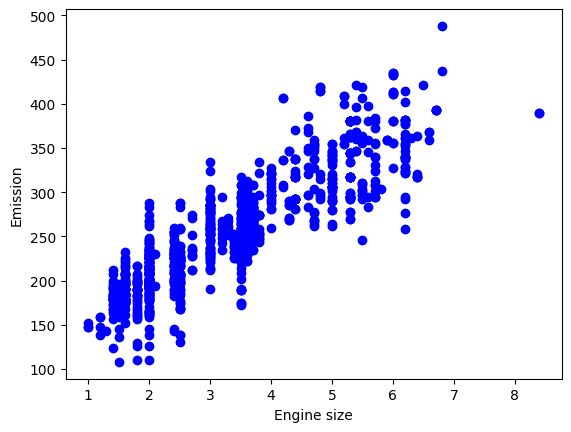

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show

In [6]:
msk = np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

<function matplotlib.pyplot.show(close=None, block=None)>

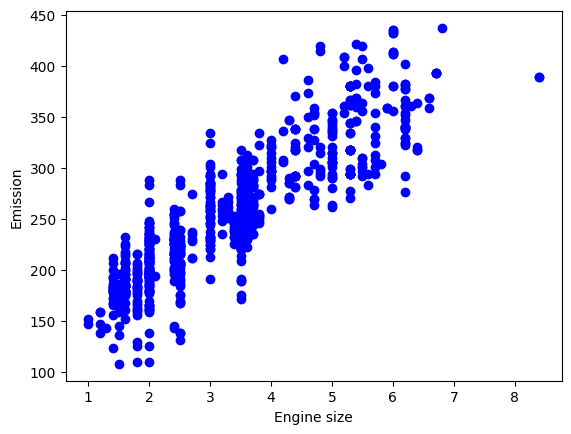

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show

In [8]:
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[39.82036871]]
Intercept: [123.18332186]


<function matplotlib.pyplot.show(close=None, block=None)>

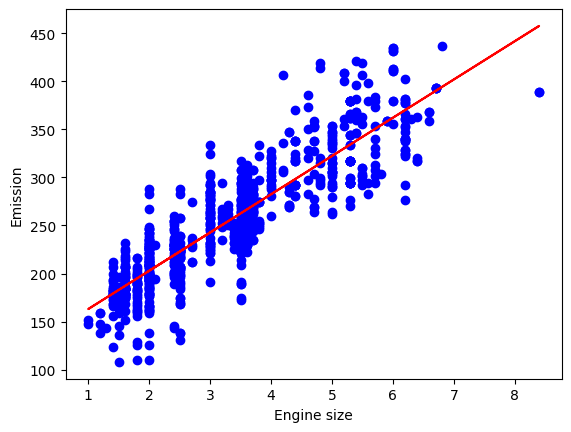

In [9]:
#plot hasil regresi

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show

In [10]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE) %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score : %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 24.70
Residual sum of squares (MSE) 1104.33
R2-score : 0.65
